# INF 510 Fall 2019 Final Project

1. **The names of team member(s):**

   Boxuan Wang

2. **How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

   This project requires the following packages:
   
   - pandas, json, seaborn, requests and beautifulsoup
   
   To run this project, make sure the above packages are installed, and then simply clone the repo at http://www.github.com/VIESON/inf510_project and execute this notebook

3. **Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**

   In this code, it takes some time (about 5-7 minutes) to run the code to import the data. During data visualization, I cannot modify the size of the font on the axis. In the final linear fitting diagram, the value of the coordinate interval is too large and cannot be changed, resulting in the slope of the straight line being not obvious in the linear fitting diagram.

4. **Anything else you feel is relevant to the grading of your project your project.**

   When the data is visualized, the chart form is too simple, and the slope of the straight line in the linear fitting graph is not obvious enough.

5. **What did you set out to study? (i.e. what was the point of your project? This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    In this project, I want to explore the relationship between the selected country's holidays days and country's GDP to figure it out does GDP are rely on holidays are relay on working efficiency. If the country have less total holidays than other select country, but the GDP are higher than other countries than it means, have less total holidays days country's working are more efficiency.

6. **What did you Discover/what were your conclusions (i.e. what were your findings? Were your original assumptions confirmed, etc.?)**

    In this project, I want to study the relationship between public holidays and GDP in a particular country. In my milestone 1, my assumption is that if the total number of holidays in one country is less than in other selected countries, but the GDP is higher than in other countries, the fewer holidays a country has, the higher the productivity of that country. . In this project, I first calculated the number of public holidays and the number of holidays in the top 50 countries by GDP and displayed them in a histogram. I then used a line chart to study the trend in days between public holidays and holidays in the top 50 countries over the past five years. Finally, I linearly fit the number of public holidays in 50 countries to the number of holiday days and their GDP. Through analysis, I found that after excluding two outliers, there are 50 countries in China and the United States corresponding. The GDP and its number of public holidays and the total number of holidays are in a linear fitting state, so it can be concluded that the country's GDP is related to the total number of holiday days, that is, the fewer vacation days, the higher the country's GDP; the higher the work efficiency, so hypothesis is valid.


7. **What difficulties did you have in completing the project?**

    In my project, the data comes from the GDP rankings, the names of the major countries in the world and their corresponding abbreviations, and the holiday information of the major countries in the world. The GDP ranking data of the major countries comes from Chinese web pages, while the other two data sources are Use the English abbreviation of the country for comparison, so when scrap the GDP information, I cannot directly crawl the webpage, so I must use the Xpath method, determine the URL, and then extract it using a regular expression. In the final data visualization, I couldn't change the size and spacing of the coordinate axes, which caused the slope of the straight line in the final linear fitting graph to be too small, and the linear relationship was not obvious.


8. **What skills did you wish you had while you were doing the project?**

    As I answered in 7, I cannot directly scraped the GDP of the specified country from the web page, I must use the Xpath method. So I studied Xpath and knew how to determine the URL through Xpath and then extract it through regular expressions.

9. **What would you do “next” to expand or augment the project?**

    In this project, only two variables between the total number of public holidays in the designated country and the GDP of the corresponding country are considered to study the relationship between vacation days, GDP and work efficiency. However, in real life, factors that affect national GDP are not only The number of public holiday days, and other unknown factors such as demographic factors will affect GDP, so I may further analyze my hypothesis by obtaining more data that may affect GDP. By mastering Xpath, I can scrape more websites to get the data I need. This will make my model more complete, and the results obtained will be more representative and reflect actual problems.

In [1]:
import re
from lxml import html
import requests
from bs4 import BeautifulSoup
import json
import argparse
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
for year in range(2014,2019):
    tempdf = pd.read_csv(f'./data/gdpDataFrame/gdpDataFrame-{year}.csv')
tempdf

,Rank,Name,Initial,Year GDP,Holiday Count,Long Week days
0,1,United States,US,201999.60,10,29
1,2,China,CN,131186.90,7,23
2,3,Japan,JP,50631.30,14,34
3,4,Germany,DE,39348.10,17,40
4,5,France,FR,27656.00,15,33
5,6,United Kingdom,GB,26612.30,13,33
6,7,India,IN,26541.70,0,0
7,8,Brazil,BR,21997.20,12,35
8,9,Italy,IT,20489.90,12,18
9,10,Canada,CA,17634.90,30,48


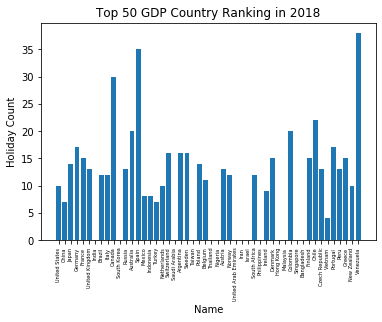

In [3]:
fig,ax=plt.subplots()
ax.bar(tempdf["Name"],tempdf["Holiday Count"])
ax.set_xlabel("Name")  #设置x轴标签
ax.set_ylabel("Holiday Count")  #设置y轴标签
# ax.set_title("Top 50 GDP Country Ranking in str(year)")  #设置标题
plt.title(f'Top 50 GDP Country Ranking in {year}')
plt.xticks(rotation=90,fontsize=5)
# ax.set_xlim(2014,2019)  #设置x轴数据限值
plt.show()  #显示图像

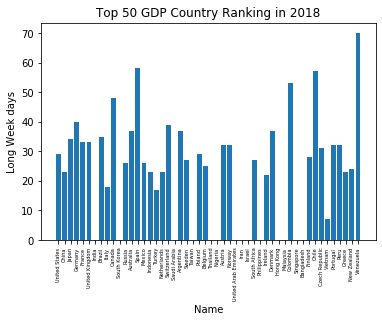

In [4]:
fig,ax=plt.subplots()
ax.bar(tempdf["Name"],tempdf["Long Week days"])
ax.set_xlabel("Name")  #设置x轴标签
ax.set_ylabel("Long Week days")  #设置y轴标签
# ax.set_title("Top 50 GDP Country Ranking in {year}") 
plt.title(f'Top 50 GDP Country Ranking in {year}') #设置标题
plt.xticks(rotation=90,fontsize=5)
# ax.set_xlim(2014,2019)  #设置x轴数据限值
plt.show()  #显示图像

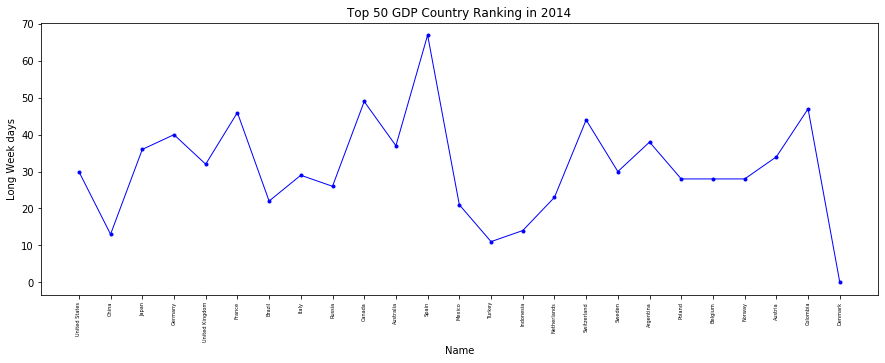

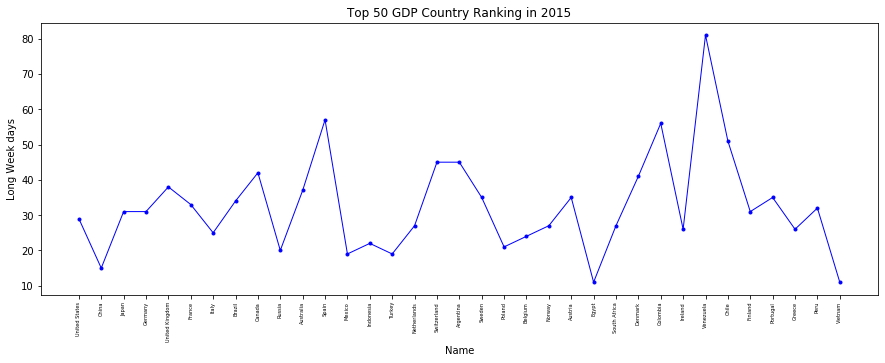

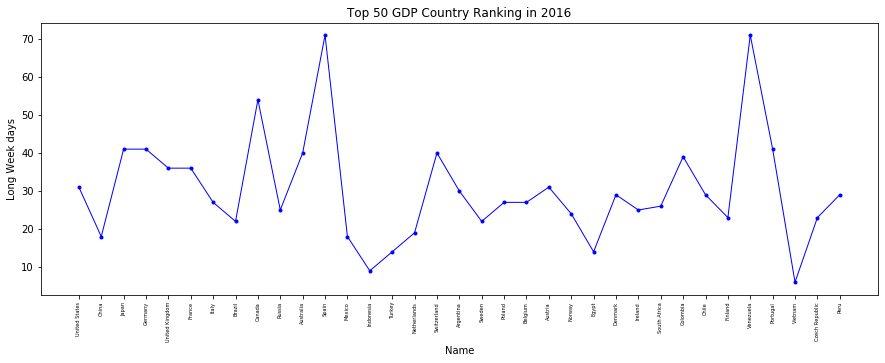

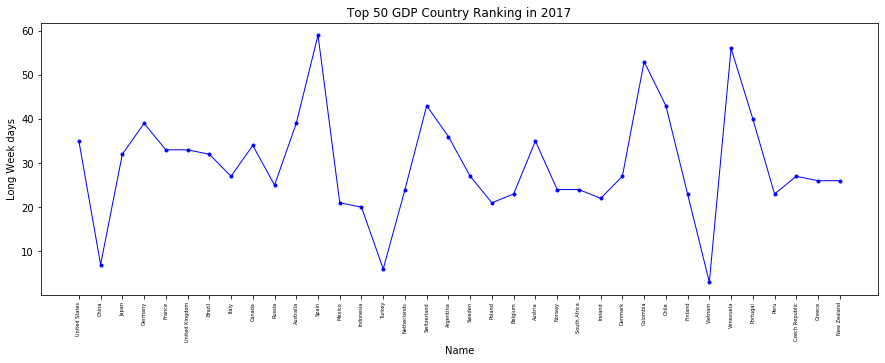

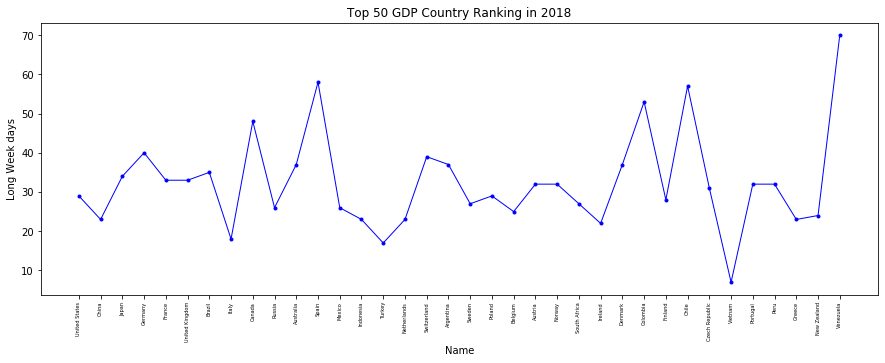

In [7]:
def trimZero(df):
    return df[df['Holiday Count'] != 0]

for year in range(2014,2019):
    tempdf = pd.read_csv(f'./data/gdpDataFrame/gdpDataFrame-{year}.csv')
    tempdf = trimZero(tempdf)
    plt.figure(figsize=(15,5))
    plt.plot(tempdf['Name'],tempdf['Long Week days'],'blue', marker='.',label='Long Week days',linewidth=1)
    plt.xticks(rotation=90,fontsize=5)
    plt.xlabel("Name")
    plt.ylabel("Long Week days")
    plt.title(f'Top 50 GDP Country Ranking in {year}')
plt.show()

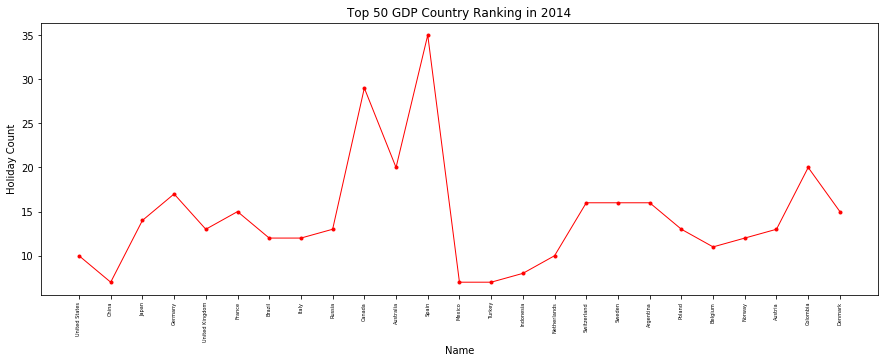

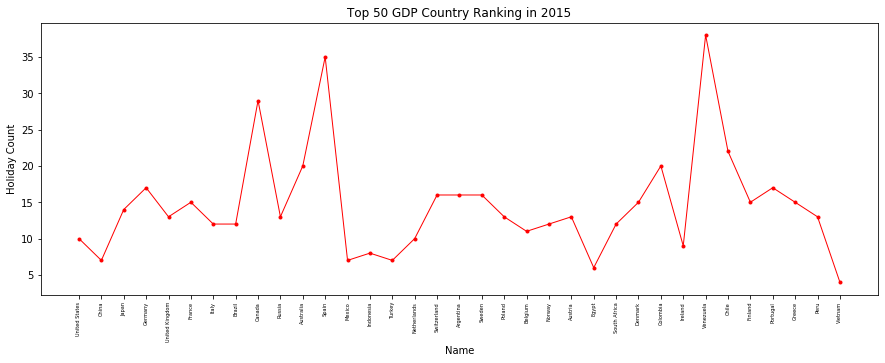

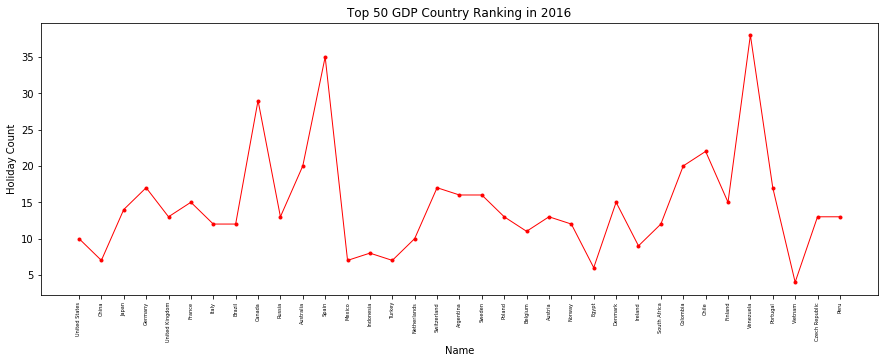

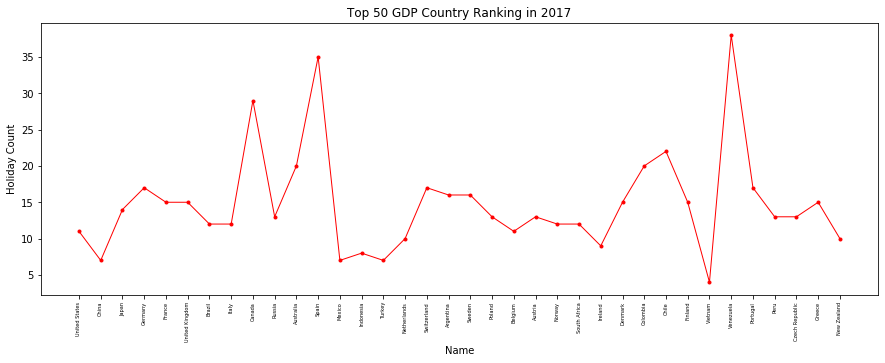

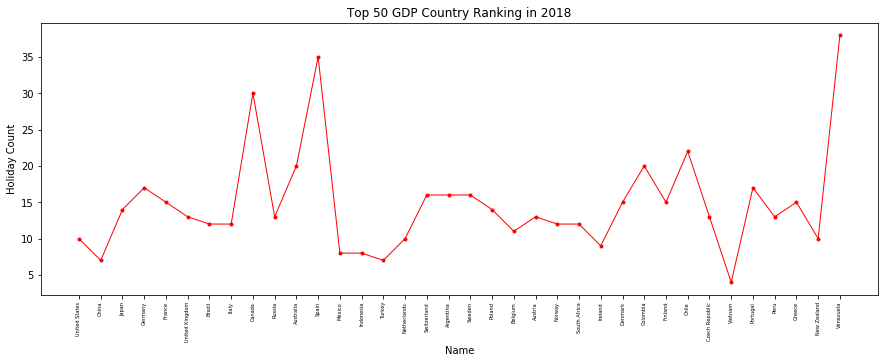

In [8]:
def trimZero(df):
    return df[df['Holiday Count'] != 0]

for year in range(2014,2019):
    tempdf = pd.read_csv(f'./data/gdpDataFrame/gdpDataFrame-{year}.csv')
    tempdf = trimZero(tempdf)
    plt.figure(figsize=(15,5))
    plt.plot(tempdf['Name'],tempdf['Holiday Count'],'red', marker='.',label='Holiday Count',linewidth=1)
    plt.xticks(rotation=90,fontsize=5)
    plt.xlabel("Name")
    plt.ylabel("Holiday Count")
    plt.title(f'Top 50 GDP Country Ranking in {year}')
plt.show()

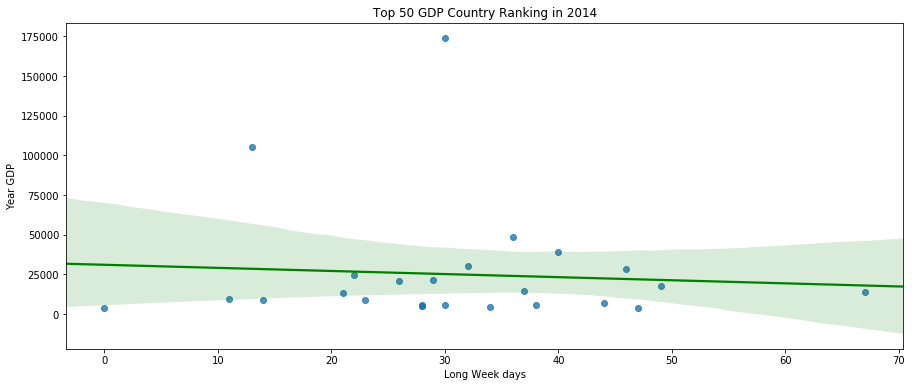

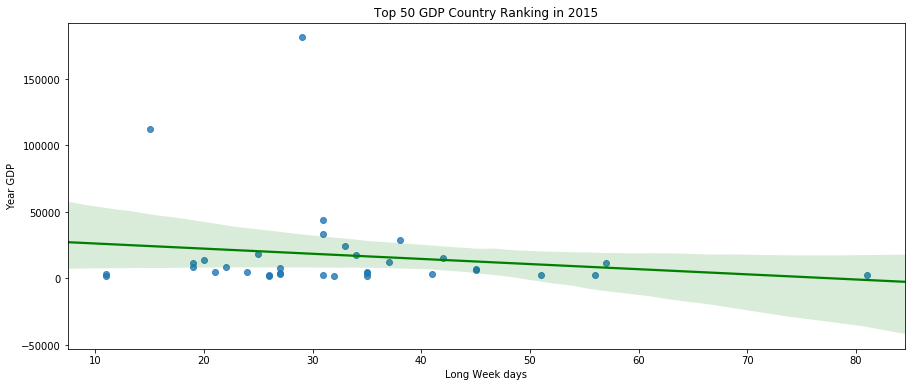

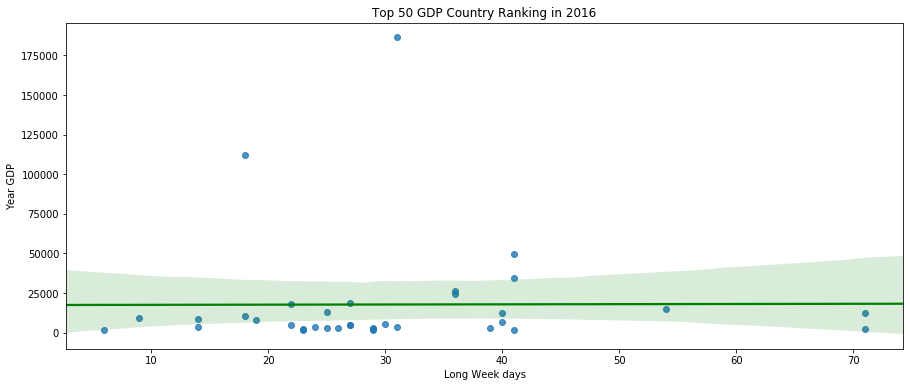

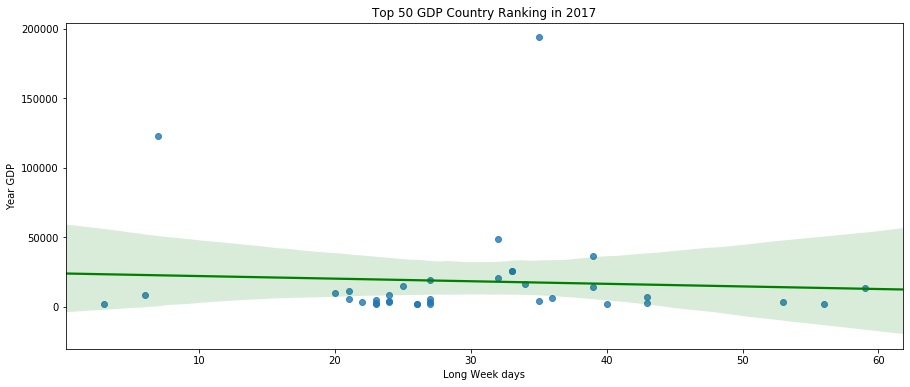

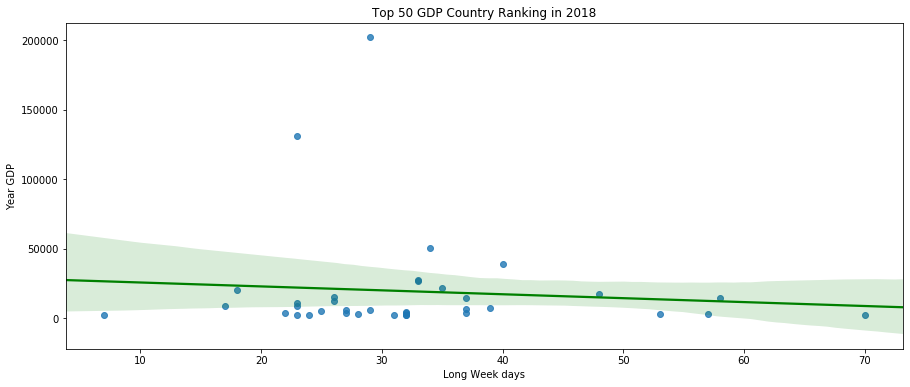

In [9]:
def trimZero(df):
    return df[df['Holiday Count'] != 0]

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator, FormatStrFormatter
for year in range(2014,2019):
    tempdf = pd.read_csv(f'./data/gdpDataFrame/gdpDataFrame-{year}.csv')
    tempdf = trimZero(tempdf)
# plt.scatter(tempdf['Name'],tempdf['Long Week days'],color='blue',label='Long Week days',alpha=0.8)
# plt.plot(tempdf['Name'],tempdf['Long Week days'],'red', marker='*',label='Top 50 GDP Country Ranking in 2014-2018')

# plt.xticks(rotation=90)
# plt.xlabel("Name")
# plt.ylabel("Long Week days")
# plt.title("Top 50 GDP Country Ranking in 2018")
    plt.figure(figsize=(15,6))
    sns.regplot(data=tempdf, x=tempdf['Long Week days'],y=tempdf['Year GDP'],line_kws={'color':'green'})
#     plt.yticks(range(0, 200000, 7000),rotation=0)
#     ymajorLocator = MultipleLocator(1000) 
#     x = range(0,80,10)
#     y = range(0,50000,2000)
#     plt.plot(x,y)
    plt.title(f'Top 50 GDP Country Ranking in {year}')
plt.show()